# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


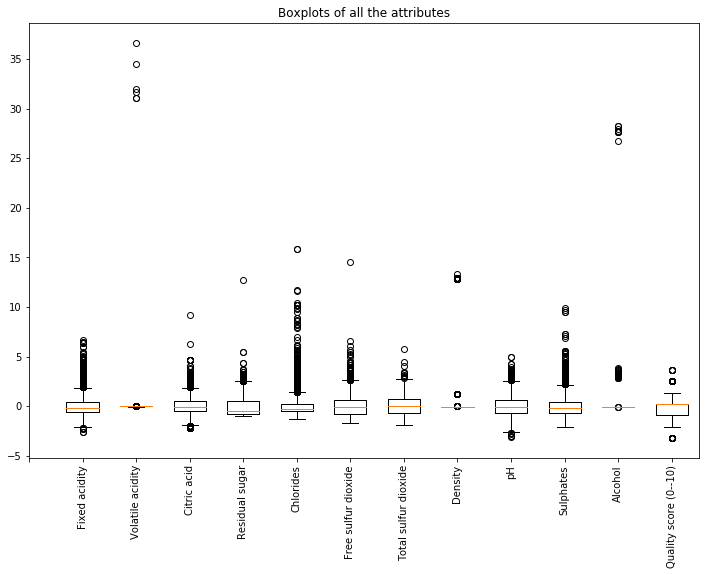

Figure 1: Boxplots of all the values in the data set.


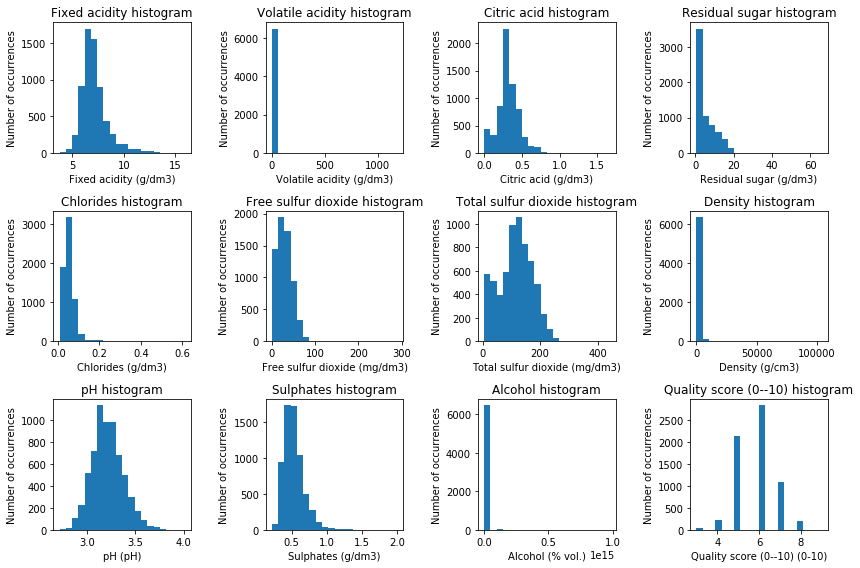

Figure 2: Histograms of all the values in the data set.


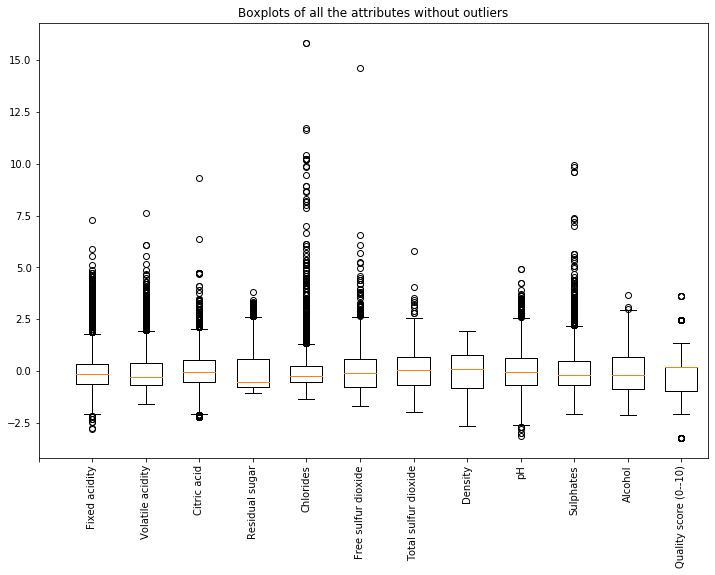

Figure 3: Boxplots of all the values in the data set without the outliers.


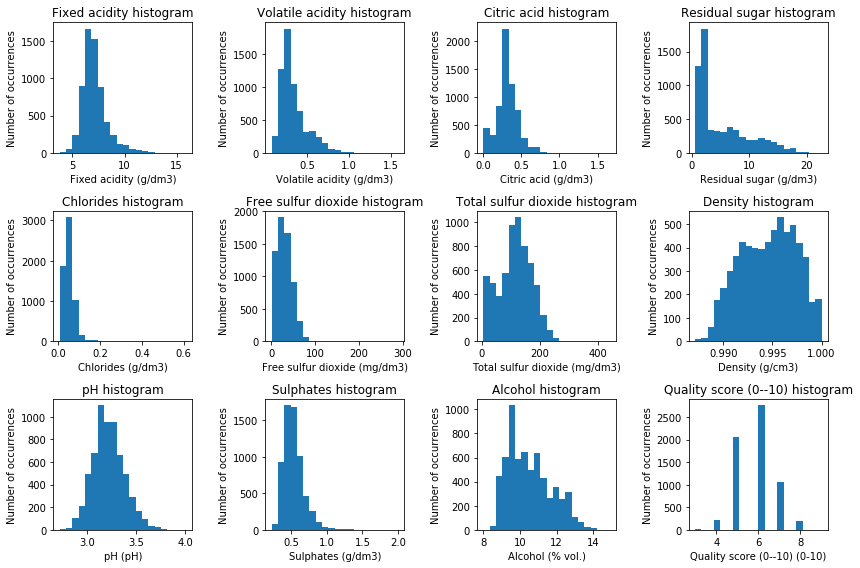

Figure 4: Histograms of all the values in the data set without the outliers.


In [2]:
import scipy.stats
import scipy.io
import scipy
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('Data/wine.mat')
dataLabels = []
for label in data['attributeNames'][0]:
    dataLabels.append(label[0])
dataUnits = ['g/dm3', 'g/dm3', 'g/dm3', 'g/dm3', 'g/dm3', 'mg/dm3', 'mg/dm3', 'g/cm3', 'pH', 'g/dm3', '% vol.', '0-10']

# Drawing figure 1: boxplots

plt.figure(figsize=(12,8))
plt.boxplot(scipy.stats.zscore(data['X']), widths = 0.6)
plt.title('Boxplots of all the attributes')
plt.xticks(np.arange(len(dataLabels)+1), ([''] + dataLabels), rotation='vertical')
plt.show()
print('Figure 1: Boxplots of all the values in the data set.')

# Drawing figure 2: histogram

fig,ax = plt.subplots(3,4,figsize=(12,8))
ax = ax.ravel()

for i in range(len(dataLabels)):
    ax[i].hist(data['X'][:,i], bins=20)
    ax[i].set_ylabel('Number of occurrences')
    ax[i].set_xlabel(dataLabels[i] + ' (' + dataUnits[i] + ')')
    ax[i].set_title(dataLabels[i] + ' histogram')

plt.tight_layout() # makes sure everything fits without overlapping
plt.show()
print('Figure 2: Histograms of all the values in the data set.')

# Filter the outliers

maxVolatileAcidity = 20
maxDensity = 10
maxAlcoholPercentage = 200

mask = (
    (data['X'][:,1] <= maxVolatileAcidity) & 
    (data['X'][:,7] <= maxDensity) & 
    (data['X'][:,10] <= maxAlcoholPercentage)
)
data['X_filtered'] = data['X'][mask]

# Drawing figure 3: filtered boxplots

plt.figure(figsize=(12,8))
plt.boxplot(scipy.stats.zscore(data['X_filtered']), widths = 0.6)
plt.title('Boxplots of all the attributes without outliers')
plt.xticks(np.arange(len(dataLabels)+1), ([''] + dataLabels), rotation='vertical')
plt.show()
print('Figure 3: Boxplots of all the values in the data set without the outliers.')

# Drawing figure 4: filtered histogram

fig,ax = plt.subplots(3,4,figsize=(12,8))
ax = ax.ravel()

for i in range(len(dataLabels)):
    ax[i].hist(data['X_filtered'][:,i], bins=20)
    ax[i].set_ylabel('Number of occurrences')
    ax[i].set_xlabel(dataLabels[i] + ' (' + dataUnits[i] + ')')
    ax[i].set_title(dataLabels[i] + ' histogram')

plt.tight_layout() # makes sure everything fits without overlapping
plt.show()
print('Figure 4: Histograms of all the values in the data set without the outliers.')



----
What you can see is that the really thin boxplots of the volatile acidity, density and alcohol percentage in Figure 1, look way better in Figure 3 where the outliers have been filtered out. Similarly the histograms in Figure 2 consist mostly of just one big bar for the volatile acidity, density and alcohol percentage, while in the histograms in Figure 4 where the outliers have been removed they contain way more visible bars, such that you can see way better how the values are distributed, since the histograms are more zoomed in because they do not need to show the outliers.

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----
We need to standardize the data after removing the outliers because the outliers have a big influence median and the other percentiles, so if we want to keep the values in the box plot centered, we need to standardize the data again after removing the outliers.

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

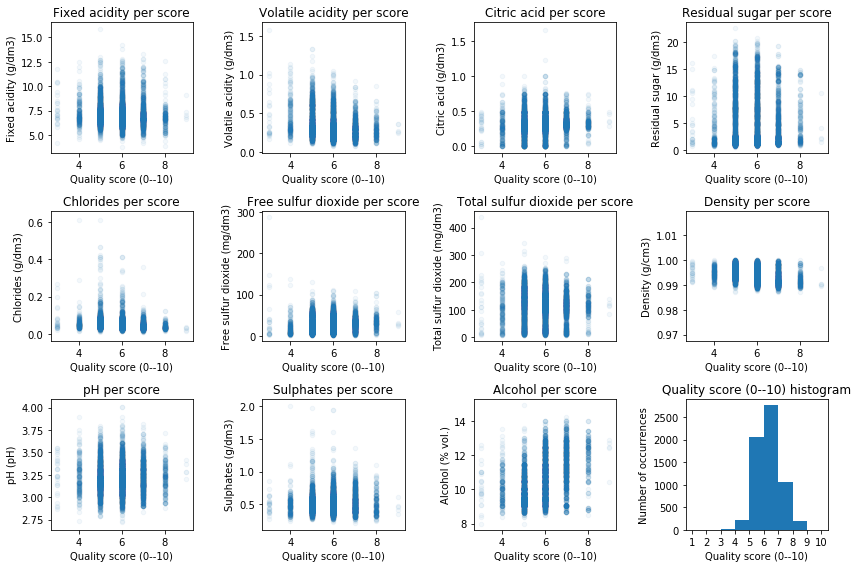

Figure 5: Scatterplots of the different attributes against the quality score as rated by humans.


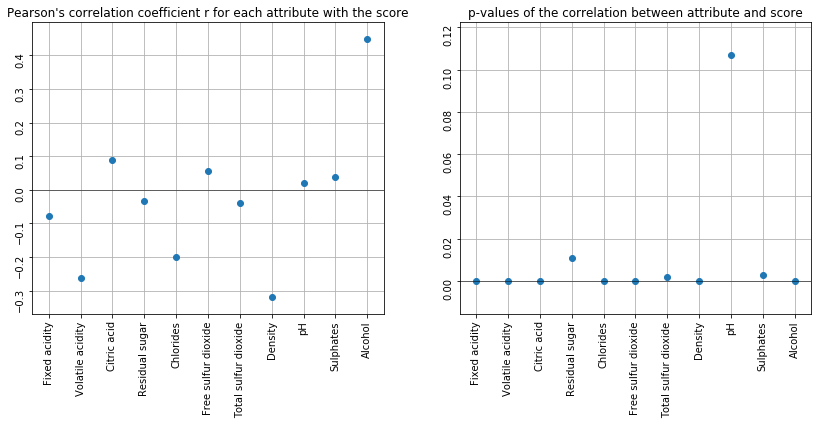

Figure 6: The correlation coefficients and corresponding p-values for every attributes correlation with the quality score


In [19]:
fig,ax = plt.subplots(3,4,figsize=(12,8))
ax = ax.ravel()

for i in range(len(dataLabels) - 1):
    ax[i].scatter(data['X_filtered'][:,11],data['X_filtered'][:,i], alpha=0.05, s=20)
    ax[i].set_ylabel(dataLabels[i] + ' (' + dataUnits[i] + ')')
    ax[i].set_xlabel(dataLabels[11])
    ax[i].set_title(dataLabels[i] + ' per score')

# The last diagram is a histogram of the scores, since the scores plotted against them selves is not so interesting
ax[11].hist(data['X_filtered'][:,11], bins=(range(1,11,1)))
ax[11].set_ylabel('Number of occurrences')
ax[11].set_xlabel(dataLabels[11])
ax[11].set_xticks(np.arange(1, 11, 1))
ax[11].set_title(dataLabels[11] + ' histogram')
    
plt.tight_layout() # makes sure everything fits without overlapping
plt.show()

print('Figure 5: Scatterplots of the different attributes against the quality score as rated by humans.')

# Correlation graphs
pearsonR = []
pValues = []
for i in range(len(dataLabels) - 1):
    r, p = scipy.stats.pearsonr(data['X_filtered'][:,i], data['X_filtered'][:,11])
    pearsonR.append(r)
    pValues.append(p)

fig1,ax1 = plt.subplots(1,2,figsize=(12,6))

ax1[0].grid()
ax1[0].set_axisbelow(True)
ax1[0].scatter(dataLabels[:-1], pearsonR)
ax1[0].tick_params(labelrotation=90)
ax1[0].axhline(0, color='black', lw=0.5)
ax1[0].set_title('Pearson\'s correlation coefficient r for each attribute with the score')

ax1[1].grid()
ax1[1].set_axisbelow(True)
ax1[1].scatter(dataLabels[:-1], pValues)
ax1[1].tick_params(labelrotation=90)
ax1[1].axhline(0, color='black', lw=0.5)
ax1[1].set_title('p-values of the correlation between attribute and score')

plt.tight_layout() # makes sure everything fits without overlapping
plt.show()
print('Figure 6: The correlation coefficients and corresponding p-values for every attributes correlation with the quality score')

----
The clearest relation you can see in Figure 5 is the possitive relation between alchol percentage and the quality score, most high rated samples have a higher alcohol percentage of around 12%, while most low rated samples have a lower alcohol percentage of around 10%. This relation is confirmed by the high correlation coefficient for alcohol in Figure 6.

Another relation you can see in Figure 5 is that the volatile acidity is generally lower for the samples with a higher quality score. However a low volaitle acidity does not necessarily mean that it gets a high quality score, since the lower rated samples can also have a low volaitle acidity, but there are almost no samples with a high score and a high volaitle acidity, so there is some negative correlation, as is confirmed by the negative correlation coefficient for volatile acidity in Figure 6.

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


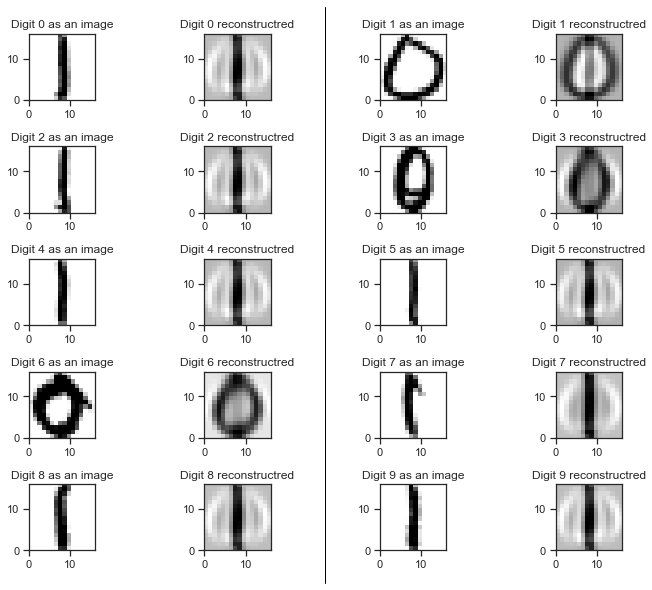

Figure 7: The first 10 digits from the filtered data set and their reconstructions based on the first four PCAs


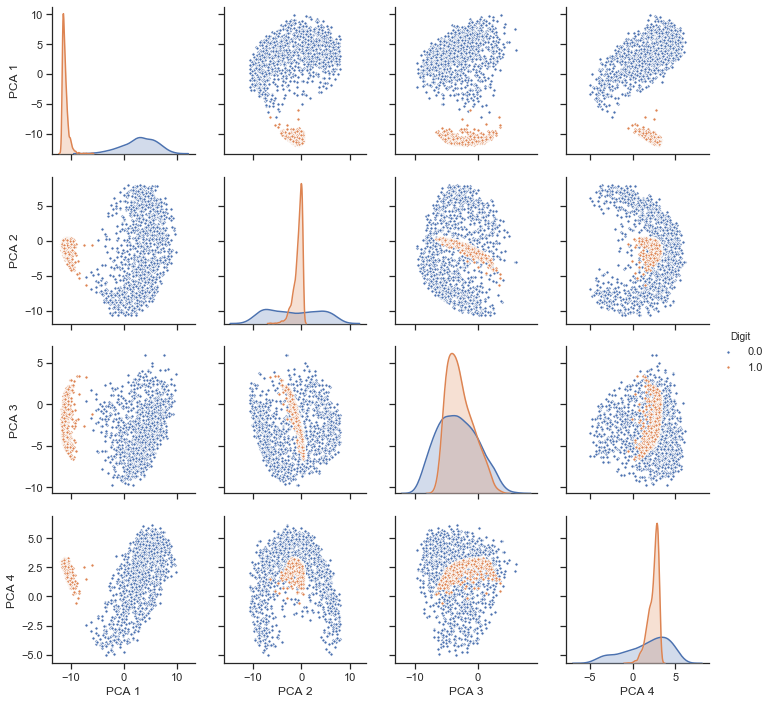

Figure 8: The first four PCAs plotted against each other seperated by digit type, with on the diagonal the distribution of the PCAs


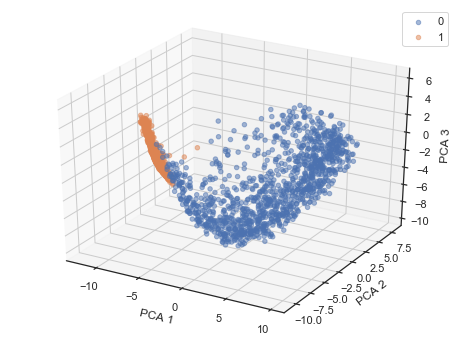

Figure 9: The first three PCAs plotted against each other in 3d seperated by digit type


In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
import numpy as np
from numpy import reshape

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Filter out digits with class index higher than 1
mask = y < 2
X = X[mask]
y = y[mask]

# Compute PCA and project data
mu = np.mean(X, axis=0)

U, s, Vt = np.linalg.svd(X - mu)
V = Vt.T
Z = np.dot(X,V)[:,:4]

W = np.dot(Z, V[:,:4].T) + mu

# Visualize the first 10 digits as images with their reconstructed counterparts
fig,ax = plt.subplots(5,4,figsize=(10,8))
ax = ax.ravel()

for i in range(10):
    I = reshape(X[i,:],(16,16))
    ax[2*i].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    ax[2*i].set_title('Digit ' + str(i) + ' as an image')
    I_reconstruct = reshape(W[i,:],(16,16))
    ax[2*i+1].imshow(I_reconstruct, extent=(0,16,0,16), cmap=cm.gray_r)
    ax[2*i+1].set_title('Digit ' + str(i) + ' reconstructred')

line = plt.Line2D((.5,.5),(0,1), color="black", linewidth=1)
fig.add_artist(line) # line between columns
    
plt.tight_layout() # makes sure everything fits without overlapping
plt.show()

print('Figure 7: The first 10 digits from the filtered data set and their reconstructions based on the first four PCAs')

# 4x4 Scatter plots of the four PCAs
import seaborn as sns
import pandas
sns.set()
data = np.insert(Z, [4], np.array(y == 1).reshape(-1,1), axis=1)
df = pandas.DataFrame(data = data, columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'Digit'])
sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(df, hue='Digit', vars=['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'], height=2.5, plot_kws={"s": 10})
plt.show()

print('Figure 8: The first four PCAs plotted against each other seperated by digit type, with on the diagonal the distribution of the PCAs')

# 3D Scatter plots of the first three PCAs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:,0][y == 0], Z[:,1][y == 0], Z[:,2][y == 0], alpha=0.5, label='0')
ax.scatter(Z[:,0][y == 1], Z[:,1][y == 1], Z[:,2][y == 1], alpha=0.5, label='1')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend()
plt.show()

print('Figure 9: The first three PCAs plotted against each other in 3d seperated by digit type')

----
In Figure 7 you can see the first 10 digits from the (filtered) data set and their reconstructions based on the first four PCAs. You can see in the reconstructed images that the first four PCAs really just capture if the image contains a circle, a more narrow ellipse, or a straight line.

In Figure 8 you can see the first four PCAs scattered against each other for the different digits. I used seaborn to create the plots as shown in the lecture slides.

In Figure 9 you can see the first three PCAs scattered against each other in a 3d plot. You can see that the 1 digits are all every close together in a cluster, while the cluster of the 0 digits is more spread out.

So what you can conclude from the various scatterplots is that PCA 1 really seperates the 1's from the 0's, as can be seen in the plot in the top left of Figure 8, and in Figure 9. PCA 2 and 4 vary the most between the 0's and not so much for the 1's, so these could determine the general shape of the 0, like whether the 0 is more like a circle or like an ellipse. PCA 3  varies for both 1's and 0's, so this one does not really seperate the data.

----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
> <center>2,3,6,8,11,18</center>
> i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
>
>+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [1]:
import numpy as np

appendages = np.array([2,3,6,8,11,18])
print('appendages: \t\t',appendages)

m = np.ndarray.mean(appendages)
print('mean: \t\t\t',m)

sigma = np.ndarray.std(appendages)
print('standard deviation: \t',sigma)

appendages: 		 [ 2  3  6  8 11 18]
mean: 			 8.0
standard deviation: 	 5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [6]:
import itertools

print('Alien pairs:')
m_pairs = []

for pair in itertools.combinations(appendages, 2):
    temp_m = np.ndarray.mean(np.array(pair))
    m_pairs.append(temp_m)
    print(pair, ' \twith mean ', temp_m)

print('\nAlien quadruples:')
m_quads = []

for quad in itertools.combinations(appendages, 4):
    temp_m = np.ndarray.mean(np.array(quad))
    m_quads.append(temp_m)
    print(quad, '\twith mean ', temp_m)

Alien pairs:
(2, 3)  	with mean  2.5
(2, 6)  	with mean  4.0
(2, 8)  	with mean  5.0
(2, 11)  	with mean  6.5
(2, 18)  	with mean  10.0
(3, 6)  	with mean  4.5
(3, 8)  	with mean  5.5
(3, 11)  	with mean  7.0
(3, 18)  	with mean  10.5
(6, 8)  	with mean  7.0
(6, 11)  	with mean  8.5
(6, 18)  	with mean  12.0
(8, 11)  	with mean  9.5
(8, 18)  	with mean  13.0
(11, 18)  	with mean  14.5

Alien quadruples:
(2, 3, 6, 8) 	with mean  4.75
(2, 3, 6, 11) 	with mean  5.5
(2, 3, 6, 18) 	with mean  7.25
(2, 3, 8, 11) 	with mean  6.0
(2, 3, 8, 18) 	with mean  7.75
(2, 3, 11, 18) 	with mean  8.5
(2, 6, 8, 11) 	with mean  6.75
(2, 6, 8, 18) 	with mean  8.5
(2, 6, 11, 18) 	with mean  9.25
(2, 8, 11, 18) 	with mean  9.75
(3, 6, 8, 11) 	with mean  7.0
(3, 6, 8, 18) 	with mean  8.75
(3, 6, 11, 18) 	with mean  9.5
(3, 8, 11, 18) 	with mean  10.0
(6, 8, 11, 18) 	with mean  10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [7]:
m_2 = np.ndarray.mean(np.array(m_pairs))
m_4 = np.ndarray.mean(np.array(m_quads))

sigma_2 = np.ndarray.std(np.array(m_pairs))
sigma_4 = np.ndarray.std(np.array(m_quads))

print('For N=2, we have m_2 =', m_2, 'and sigma_2 =', sigma_2)
print('For N=4, we have m_4 =', m_4, 'and sigma_4 =', sigma_4)



For N=2, we have m_2 = 8.0 and sigma_2 = 3.40587727318528
For N=4, we have m_4 = 8.0 and sigma_4 = 1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

----
The population mean and the mean of both sample means are all 8.0.

The population standard deviation is $\sigma \approx 5.385$, and $\sigma_2 \approx 3.406$ and $\sigma_2 \approx 1.703$.

For N=2 we have $\frac{\sigma}{\sqrt{2}} \approx 3.808$ thus have $3.406 \approx 3.808$ which means that indeed
$\sigma_x \approx \frac{\sigma}{\sqrt{N}}$.

Or with the better approximation for small population sizes we have 
$\frac{\sigma}{\sqrt{N}} \times \sqrt{\frac{M-N}{M-1}} = \frac{5.385}{\sqrt{2}} \times \sqrt{\frac{6-2}{6-1}} \approx 3.406 = 3.406$, which means that $\sigma_x = \frac{\sigma}{\sqrt{N}} \times \sqrt{\frac{M-N}{M-1}}$ holds.

For N=4 we have $\frac{\sigma}{\sqrt{4}} \approx 2.693$ thus have $1.703 \approx 2.693$ which means that 
$\sigma_x \approx \frac{\sigma}{\sqrt{N}}$ is somewhat questionable.

With the better approximation for small population sizes we have 
$\frac{\sigma}{\sqrt{N}} \times \sqrt{\frac{M-N}{M-1}} = \frac{5.385}{\sqrt{4}} \times \sqrt{\frac{6-4}{6-1}} \approx 1.703 = 1.703$, which means that $\sigma_x = \frac{\sigma}{\sqrt{N}} \times \sqrt{\frac{M-N}{M-1}}$ holds.


----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

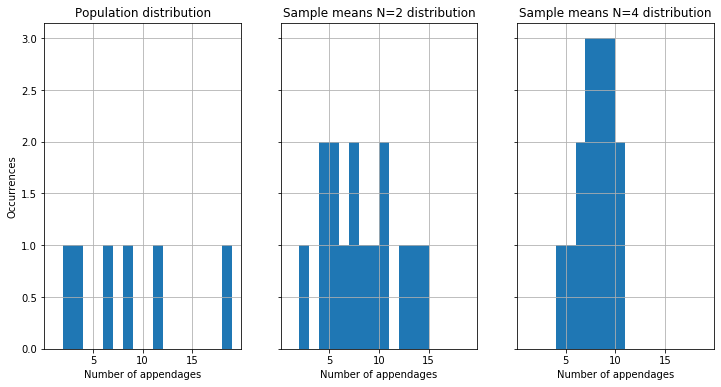

Figure 10: Histograms of the population appendages distribution and the distribution of the sample means


In [21]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(12,6),sharey='all')
ax[0].hist(appendages, bins=(range(1,20,1)))
ax[0].set_title('Population distribution')
ax[1].hist(m_pairs, bins=(range(1,20,1)))
ax[1].set_title('Sample means N=2 distribution')
ax[2].hist(m_quads, bins=(range(1,20,1)))
ax[2].set_title('Sample means N=4 distribution')

for a in ax:
    a.set_xlabel('Number of appendages')
    a.grid()

ax[0].set_ylabel('Occurrences')

plt.show()
print('Figure 10: Histograms of the population appendages distribution and the distribution of the sample means')


----
The shape of the sample means distribution as the sample size (N*) increases looks increasingly more like a normal distribution, which corresponds with what the Central Limit Theorem says.

----